In [1]:
import numpy as np

In [2]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import yfinance as yf

In [80]:
assets=['HDFCBANK.NS','RELIANCE.NS','TATAMOTORS.NS','ITC.NS','GC=F','BTC-USD']
benchmark=['^NSEI']

In [81]:
data=yf.download(assets,start='2021-01-01')['Close']
data

/var/folders/qc/mp0ckzqj69d2j1dn854y6dxc0000gn/T/ipykernel_1591/1381832698.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(assets,start='2021-01-01')['Close']
[*********************100%***********************]  6 of 6 completed


Ticker,BTC-USD,GC=F,HDFCBANK.NS,ITC.NS,RELIANCE.NS,TATAMOTORS.NS
Date,,,,,,
2021-01-01,29374.152344,NaN,674.886353,175.086380,901.194702,183.201447
2021-01-02,32127.267578,NaN,NaN,NaN,NaN,NaN
2021-01-03,32782.023438,NaN,NaN,NaN,NaN,NaN
2021-01-04,31971.914062,1944.699951,670.600403,174.717941,902.713623,187.916565
2021-01-05,33992.429688,1952.699951,675.667725,173.121399,891.491150,189.782944
...,...,...,...,...,...,...
2025-12-03,93527.804688,4199.299805,1000.500000,400.500000,1538.800049,356.850006
2025-12-04,92141.625000,4211.799805,997.200012,403.049988,1535.599976,356.450012
2025-12-05,89387.757812,4212.899902,1003.299988,404.950012,1540.599976,353.600006


In [95]:
data1=yf.download(benchmark,start='2021-01-01')['Close']
data1

/var/folders/qc/mp0ckzqj69d2j1dn854y6dxc0000gn/T/ipykernel_1591/100036023.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1=yf.download(benchmark,start='2021-01-01')['Close']
[*********************100%***********************]  1 of 1 completed


Ticker,^NSEI
Date,
2021-01-01,14018.500000
2021-01-04,14132.900391
2021-01-05,14199.500000
2021-01-06,14146.250000
2021-01-07,14137.349609
...,...
2025-12-01,26175.750000
2025-12-02,26032.199219
2025-12-03,25986.000000


In [82]:
weights=np.random.random(len(assets))
weights/=np.sum(weights)
weights

array([0.02012735, 0.18073397, 0.25331612, 0.10898817, 0.19573648,
       0.24109792])

In [83]:
sum(weights)

0.9999999999999999

#                                             Daily Returns

In [84]:
daily_returns=(data/data.shift(1)-1)*100
daily_returns

Ticker,BTC-USD,GC=F,HDFCBANK.NS,ITC.NS,RELIANCE.NS,TATAMOTORS.NS
Date,,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,9.372578,NaN,NaN,NaN,NaN,NaN
2021-01-03,2.038007,NaN,NaN,NaN,NaN,NaN
2021-01-04,-2.471200,NaN,NaN,NaN,NaN,NaN
2021-01-05,6.319658,0.411375,0.755640,-0.913783,-1.243193,0.993195
...,...,...,...,...,...,...
2025-12-03,2.383795,0.303342,1.081028,-0.112236,-0.485029,-1.354525
2025-12-04,-1.482104,0.297669,-0.329834,0.636701,-0.207959,-0.112090
2025-12-05,-2.988733,0.026119,0.611710,0.471412,0.325606,-0.799553


# Average Daily Return

In [85]:
avg_dailyret=daily_returns.mean()
avg_dailyret

Ticker
BTC-USD          0.110264
GC=F             0.072133
HDFCBANK.NS      0.039441
ITC.NS           0.098368
RELIANCE.NS      0.075752
TATAMOTORS.NS    0.110090
dtype: float64

In [86]:
avg_dailyret['ITC.NS']*252

24.788640637948454

# Annual Returns

In [87]:
annual_return = avg_dailyret.copy()

for a in assets:
    if a == 'BTC-USD':
        annual_return[a] = avg_dailyret[a] * 365
    else:
        annual_return[a] = avg_dailyret[a] * 252
annual_return

Ticker
BTC-USD          40.246331
GC=F             18.177395
HDFCBANK.NS       9.939173
ITC.NS           24.788641
RELIANCE.NS      19.089485
TATAMOTORS.NS    27.742755
dtype: float64

# Covariance of Assets

In [88]:
cov=daily_returns.cov()
cov

Ticker,BTC-USD,GC=F,HDFCBANK.NS,ITC.NS,RELIANCE.NS,TATAMOTORS.NS
Ticker,,,,,,
BTC-USD,9.461302,0.131889,0.084812,-0.090217,-0.087830,0.239671
GC=F,0.131889,0.965234,0.013907,0.053640,-0.013879,0.006255
HDFCBANK.NS,0.084812,0.013907,1.606719,0.263966,0.578528,0.694512
ITC.NS,-0.090217,0.053640,0.263966,1.571722,0.449426,0.682497
RELIANCE.NS,-0.087830,-0.013879,0.578528,0.449426,1.865503,1.043852
TATAMOTORS.NS,0.239671,0.006255,0.694512,0.682497,1.043852,6.436784


# Daily Risk of Assets

In [89]:
daily_risk=daily_returns.std()
daily_risk

Ticker
BTC-USD          3.075923
GC=F             0.982463
HDFCBANK.NS      1.267564
ITC.NS           1.253684
RELIANCE.NS      1.365834
TATAMOTORS.NS    2.537082
dtype: float64

In [90]:
daily_risk['ITC.NS']*15.87

19.89595809138317

# Annual Risk of Assets

In [91]:
annual_risk=daily_risk.copy()
for a in assets:
    if a=='BTC-USD':
        annual_risk[a]=daily_risk[a]*(365**0.5)
    else:
        annual_risk[a]=daily_risk[a]*(252**0.5)
annual_risk        

Ticker
BTC-USD          58.765426
GC=F             15.596118
HDFCBANK.NS      20.121960
ITC.NS           19.901610
RELIANCE.NS      21.681943
TATAMOTORS.NS    40.274924
dtype: float64

# Portfolio Variance

In [92]:
portfolio_var=np.dot(weights.T,np.dot(daily_returns.cov()*250,weights))      #Portfolio variance
portfolio_var

229.78028404517318

# Portfolio Risk

In [93]:
portfolio_risk=np.sqrt(portfolio_var)
print(str(round(portfolio_risk,2))+'%')

15.16%


# Portfolio Return

In [94]:
portfolio_return=np.dot(annual_return,weights)
print(str(round(portfolio_return,2))+'%')

19.74%


# Nifty50 (Benchmark) Daily Returns

In [98]:
benchmark_dailyreturns=(data1/data1.shift(1)-1)*100
benchmark_dailyreturns

Ticker,^NSEI
Date,
2021-01-01,NaN
2021-01-04,0.816067
2021-01-05,0.471238
2021-01-06,-0.375013
2021-01-07,-0.062917
...,...
2025-12-01,-0.103802
2025-12-02,-0.548411
2025-12-03,-0.177470


# Nifty50 (Benchmark) Average Daily Returns

In [105]:
nifty_avgreturn=benchmark_dailyreturns.mean()
nifty_avgreturn

Ticker
^NSEI    0.055239
dtype: float64

# Nifty50 (Benchmark) Annual Returns

In [106]:
nifty_annualreturn=nifty_avgreturn*252
nifty_annualreturn

Ticker
^NSEI    13.920303
dtype: float64

# Daily Risk of Nifty50 (Benchmark)

In [107]:
nifty_dailyrisk=benchmark_dailyreturns.std()
nifty_dailyrisk

Ticker
^NSEI    0.885408
dtype: float64

# Annual Risk of Nifty50 (Benchmark)

In [104]:
nifty_annualrisk=nifty_dailyrisk*(252**0.5)
nifty_annualrisk

Ticker
^NSEI    14.055421
dtype: float64

In [120]:
a=np.squeeze(nifty_annualrisk)
a

14.055421289339636

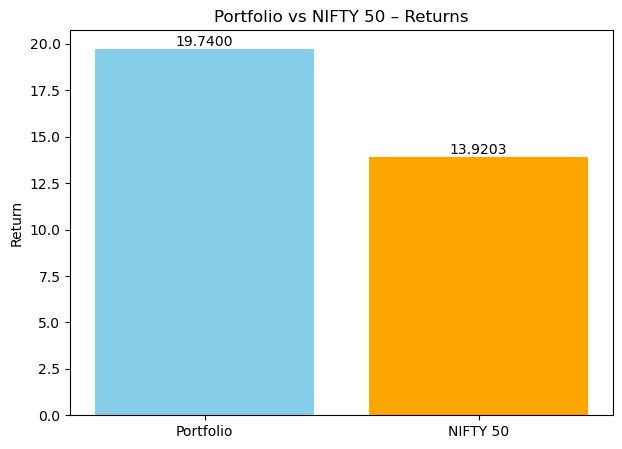

In [124]:
import numpy as np

labels = ['Portfolio', 'NIFTY 50']
returns = [float(np.squeeze(portfolio_return)), float(np.squeeze(nifty_annualreturn))]   # <- coercion to scalars

plt.figure(figsize=(7,5))
bars = plt.bar(labels, returns,color=['skyblue', 'orange'])
plt.title("Portfolio vs NIFTY 50 – Returns")
plt.ylabel("Return")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.4f}", ha='center', va='bottom')
plt.show()


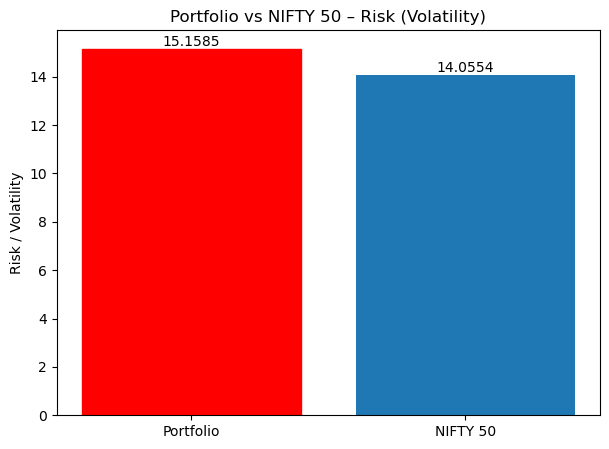

In [119]:
risks = [float(np.squeeze(portfolio_risk)), float(np.squeeze(nifty_annualrisk))]

plt.figure(figsize=(7,5))
bars = plt.bar(['Portfolio','NIFTY 50'], risks)
bars[0].set_color('red'); bars[0].set_hatch('///')
plt.title("Portfolio vs NIFTY 50 – Risk (Volatility)")
plt.ylabel("Risk / Volatility")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.4f}", ha='center', va='bottom')

plt.show()
